In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/太陽能競賽/training_data/L1_Train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101673 entries, 0 to 101672
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   LocationCode     101673 non-null  int64  
 1   DateTime         101673 non-null  object 
 2   WindSpeed(m/s)   101673 non-null  float64
 3   Pressure(hpa)    101673 non-null  float64
 4   Temperature(°C)  101673 non-null  float64
 5   Humidity(%)      101673 non-null  float64
 6   Sunlight(Lux)    101673 non-null  float64
 7   Power(mW)        101673 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [ ]:
train = data[data['Sunlight(Lux)'] < 117758.2]
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101121 entries, 0 to 101672
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   LocationCode     101121 non-null  int64  
 1   DateTime         101121 non-null  object 
 2   WindSpeed(m/s)   101121 non-null  float64
 3   Pressure(hpa)    101121 non-null  float64
 4   Temperature(°C)  101121 non-null  float64
 5   Humidity(%)      101121 non-null  float64
 6   Sunlight(Lux)    101121 non-null  float64
 7   Power(mW)        101121 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.9+ MB


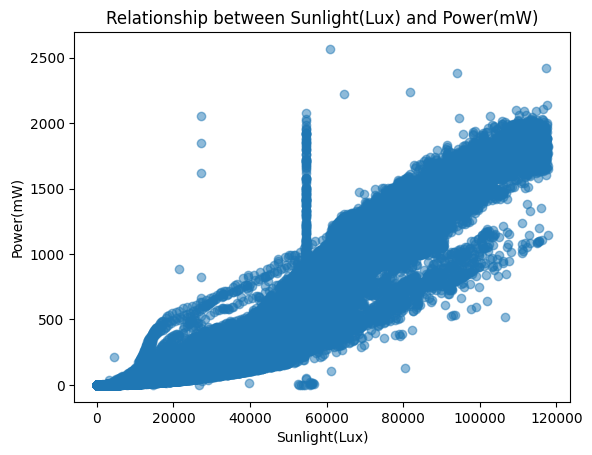

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train['Sunlight(Lux)'], train['Power(mW)'], alpha=0.5)
plt.xlabel('Sunlight(Lux)')
plt.ylabel('Power(mW)')
plt.title('Relationship between Sunlight(Lux) and Power(mW)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = train[['Power(mW)']]   # 特徵
y = train['Sunlight(Lux)'] # 目標變數
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
RF_regressor = RandomForestRegressor(random_state=42)
RF_regressor.fit(X_train, y_train)
y_RF_pred = RF_regressor.predict(X_test)
RF_mse = mean_squared_error(y_test, y_RF_pred)
print(f'Mean Squared Error (RF_MSE): {RF_mse}')

Mean Squared Error (RF_MSE): 34735819.03323241


In [ ]:
!pip install xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train, y_train)
y_xgb_pred = xgb_regressor.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_xgb_pred)
print(f'Mean Squared Error (xgb_MSE): {xgb_mse}')

Mean Squared Error (xgb_MSE): 27202200.524781764


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
simple_regressor = LinearRegression()
simple_regressor.fit(X_train, y_train)
y_simple_pred = simple_regressor.predict(X_test)
simple_mse = mean_squared_error(y_test, y_simple_pred)
print(f'Mean Squared Error (simple_mse): {simple_mse}')

Mean Squared Error (simple_mse): 73776279.37374778


In [ ]:
print(73776279.37374778>27202200.524781764)

True


In [ ]:
test = data[data['Sunlight(Lux)'] == 117758.2]
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 968 to 100381
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LocationCode     552 non-null    int64  
 1   DateTime         552 non-null    object 
 2   WindSpeed(m/s)   552 non-null    float64
 3   Pressure(hpa)    552 non-null    float64
 4   Temperature(°C)  552 non-null    float64
 5   Humidity(%)      552 non-null    float64
 6   Sunlight(Lux)    552 non-null    float64
 7   Power(mW)        552 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 38.8+ KB


In [ ]:
data_sort = pd.concat([train,test])
# data_sort
data_sort.reset_index(inplace=True, drop=True)
data_sort

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,1,2024-01-01 06:31:08.000,0.0,1016.50,17.5,86.8,25.00,0.00
1,1,2024-01-01 06:32:08.000,0.0,1016.53,17.5,86.7,28.33,0.00
2,1,2024-01-01 06:33:08.000,0.0,1016.57,17.5,86.7,32.50,0.00
3,1,2024-01-01 06:34:08.000,0.0,1016.58,17.5,86.7,39.17,0.00
4,1,2024-01-01 06:35:08.000,0.0,1016.59,17.5,86.7,45.83,0.00
...,...,...,...,...,...,...,...,...
101668,1,2024-05-30 11:10:21.000,0.0,1003.34,43.5,43.5,117758.20,1335.60
101669,1,2024-05-30 11:11:21.000,0.0,1003.35,44.1,43.1,117758.20,1528.16
101670,1,2024-06-05 11:16:36.000,0.0,1007.42,45.9,26.6,117758.20,1211.85
101671,1,2024-06-05 11:50:36.000,0.0,1007.16,42.6,32.4,117758.20,1310.69


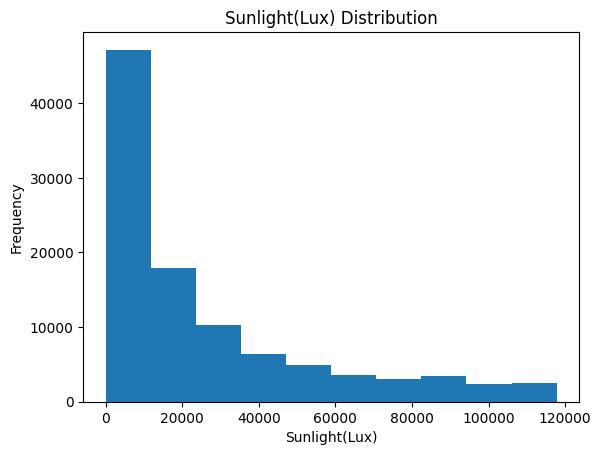

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data_sort['Sunlight(Lux)'], bins=10)
plt.xlabel('Sunlight(Lux)')
plt.ylabel('Frequency')
plt.title('Sunlight(Lux) Distribution')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
# 篩選訓練資料：Sunlight(Lux) < 117758.2
train_data_frame = data[data['Sunlight(Lux)'] < 117758.2]

In [ ]:
# Step 2: 定義特徵 (X) 和目標變數 (y)
X = train_data_frame[['Power(mW)']]  # 特徵為 Power(mW)
y = train_data_frame['Sunlight(Lux)']  # 目標變數為 Sunlight(Lux)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
y_test_pred = regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
mse_percentage = (test_mse / y_test.mean()) * 100
print("測試集 MSE:", mse_percentage)

測試集 MSE: 291840.16878818104


In [ ]:
# 篩選預測資料：Sunlight(Lux) == 117758.2
predict_data = data[data['Sunlight(Lux)'] == 117758.2]

In [ ]:
print("Training data shape:", train_data.shape)
print("Prediction data shape:", predict_data.shape)

Training data shape: (101121, 8)
Prediction data shape: (552, 8)


In [ ]:
# 建立線性迴歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 定義預測的 X 值
## 注意：現在是要用Power(mW) 回推Lux
X_predict = predict_data[['Power(mW)']]

print(X_predict)

        Power(mW)
968       1771.11
970       1772.68
971       1756.16
972       1785.08
973       1759.77
...           ...
71929     1335.60
71930     1528.16
75825     1211.85
75859     1310.69
100381    1780.95

[552 rows x 1 columns]


In [ ]:
# 預測 Lux
predicted_Lux = model.predict(X_predict)

In [ ]:
data['Sunlight(Lux)-reg'] = model.predict(data[['Power(mW)']])

In [ ]:
data.to_csv('/content/drive/MyDrive/太陽能競賽/training_data/L1_Train_with_regression.csv', index=False)